In [758]:
import numpy as np
import pandas as pd

In [759]:
hills_df = pd.read_csv('hills2000.csv')
hills_df.head(10)

,rownames,dist,climb,time,timef
0,Tiso Carnethy,6.0,2500,0.782222,0.919167
1,Criffel,7.0,1800,0.793333,1.003333
2,Chapelgill,1.5,1400,0.314444,0.376667
3,Norman's Law,5.0,700,0.464167,0.609167
4,Craig Dunain,6.0,900,0.546111,0.625833
5,Knockfarrel,5.0,1200,0.623333,0.734167
6,Screel,4.0,1300,0.458889,0.543611
7,O.P.S. Clachnaben,10.5,3500,1.278889,1.487778
8,Whangie Whizz,3.5,800,0.395556,0.464167
9,Stuc A'Chroin,14.0,5000,1.983333,2.398889


In [760]:
#Problem 1:
def multiple_lin_reg(feature1, feature2, y):
    X = np.column_stack((feature1, feature2))
    # Adding 1's to matrix to calculate the intercept value as well 
    X_with_intercept = np.column_stack((np.ones(X.shape[0]), X))
    coeff = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
    return coeff

In [761]:
multiple_lin_reg(hills_df['dist'].values,hills_df['climb'].values,hills_df['time'].values)

array([-3.34257060e-01,  1.65544983e-01,  4.44646832e-05])

Equation: 
y_time = -0.3343 + 0.1655 * x_dist + 0.0004 * x_climb

In [762]:
#Problem 2: 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error

X_train, X_test = hills_df[['dist','climb']], hills_df[['dist','climb']]
y_train, y_test = hills_df['time'], hills_df['time']

model = lr(fit_intercept=True)

model.fit(X_train, y_train)

beta0, beta1, beta2 = model.intercept_, model.coef_[0], model.coef_[1]
print('Model coefficients: beta0=%.2f, beta1=%.2f, beta2=%.2f\n'%(beta0, beta1, beta2))
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Model coefficients: beta0=-0.33, beta1=0.17, beta2=0.00

Mean Squared Error: 0.0429400662390192


In [763]:
#creating interaction term:
hills_df['dist*climb'] = hills_df.dist * hills_df.climb 

X_train, X_test = hills_df[['dist','climb','dist*climb']], hills_df[['dist','climb','dist*climb']]
y_train, y_test = hills_df['time'], hills_df['time']
                                
model = lr(fit_intercept=True)

model.fit(X_train, y_train)

beta0, beta1, beta2, beta3 = model.intercept_, model.coef_[0],\
                            model.coef_[1], model.coef_[2]
print('Model coefficients: beta0=%.3f, beta1=%.3f, beta2=%.3f, beta3=%.3f\n'%
      (beta0, beta1, beta2, beta3))

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Model coefficients: beta0=0.137, beta1=0.069, beta2=0.000, beta3=0.000

Mean Squared Error: 0.008829326670003596


In [764]:
hills_df['dist_sq'] = hills_df.dist**2
hills_df['climb_sq'] = hills_df.climb**2

In [765]:
X_train, X_test = hills_df[['dist','climb','dist_sq','climb_sq']], hills_df[['dist','climb','dist_sq','climb_sq']]
y_train, y_test = hills_df['time'], hills_df['time']

model = lr(fit_intercept=True)

model.fit(X_train, y_train)

beta0, beta1, beta2, beta3, beta4 = model.intercept_, model.coef_[0],\
                            model.coef_[1], model.coef_[2], model.coef_[3]
print('Model coefficients: beta0=%.3f, beta1=%.3f, beta2=%.3f, beta3=%.3f\n, beta4=%.3f\n'%
      (beta0, beta1, beta2, beta3, beta4))

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Model coefficients: beta0=0.053, beta1=0.063, beta2=0.000, beta3=0.002
, beta4=0.000

Mean Squared Error: 0.0076243563072323035


Of the three models, the third one that includes the squared effect had the smallest mean of the squared errors. The model that fits the data second best is the second model. The first model had the highest mean squared error. 

In [766]:
#Problem 3:
from sklearn.model_selection import cross_val_predict

model = lr(fit_intercept=True)

mse_scorer = make_scorer(mean_squared_error)

X = hills_df[['dist','climb']]
y = hills_df['time']

y_pred_1 = cross_val_predict(model, X, y, cv=5) 

residuals_1 = y - y_pred_1
print("Mean Squared Error:", np.mean(residuals_1**2))

Mean Squared Error: 0.18248099807110016


In [767]:
model = lr(fit_intercept=True)

X = hills_df[['dist','climb','dist*climb']]
y = hills_df['time']

y_pred_2 = cross_val_predict(model, X, y, cv=5) 

residuals_2 = y - y_pred_2
print("Mean Squared Error:", np.mean(residuals_2**2))

Mean Squared Error: 0.0403486354477266


In [768]:
model = lr(fit_intercept=True)

X = hills_df[['dist','climb','dist_sq','climb_sq']]
y = hills_df['time']

y_pred_3 = cross_val_predict(model, X, y, cv=5)  

residuals_3 = y - y_pred_3
print("Mean Squared Error:", np.mean(residuals_3**2))

Mean Squared Error: 0.035726189072590696


The model with the lowest average mean squared error after 5-fold was the third with squares of the features rather than the second model with the interaction between the two features. This is the same result as in Problem 2, so no the conclusion hasn't changed. 

Text(0.5, 1.0, 'Climb vs. Time')

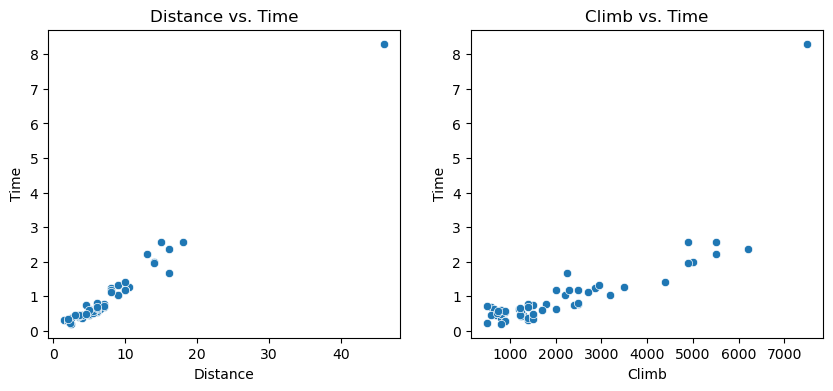

In [769]:
#Problem 4
import seaborn as sns
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.scatterplot(x = hills_df['dist'], y = hills_df['time'],ax=ax[0])
sns.scatterplot(x = hills_df['climb'], y = hills_df['time'],ax=ax[1])

ax[0].set_xlabel('Distance')
ax[0].set_ylabel('Time')
ax[0].set_title('Distance vs. Time')

ax[1].set_xlabel('Climb')
ax[1].set_ylabel('Time')
ax[1].set_title('Climb vs. Time')

Text(0.5, 1.0, 'Model 3 (Dist & Climb Squared) Prediction vs. Residuals')

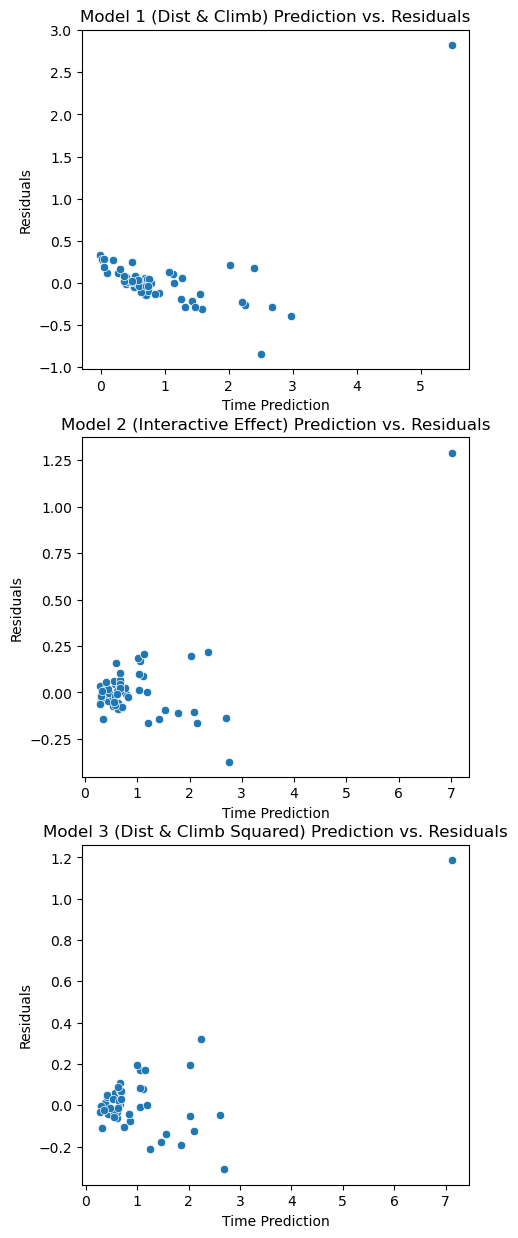

In [770]:
fig, ax = plt.subplots(3,1,figsize=(5,15))
sns.scatterplot(x = y_pred_1, y = residuals_1,ax=ax[0])
sns.scatterplot(x = y_pred_2, y = residuals_2,ax=ax[1])
sns.scatterplot(x = y_pred_3, y = residuals_3,ax=ax[2])

ax[0].set_xlabel('Time Prediction')
ax[0].set_ylabel('Residuals')
ax[0].set_title('Model 1 (Dist & Climb) Prediction vs. Residuals')

ax[1].set_xlabel('Time Prediction')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Model 2 (Interactive Effect) Prediction vs. Residuals')

ax[2].set_xlabel('Time Prediction')
ax[2].set_ylabel('Residuals')
ax[2].set_title('Model 3 (Dist & Climb Squared) Prediction vs. Residuals')

Based on these residual plots I would've chosen either model 2 or 3. Although none of them have a very clear pattern/relationship, one could argue that model 1 residuals have a very slightly negative correlation, while model 2 or 3 don't. Picking between 2 and 3 is more ambiguous, but it would seem that model 3 is tiniest bit more random/scattered than model 2. 

array([[1.        , 0.68218004],
       [0.68218004, 1.        ]])

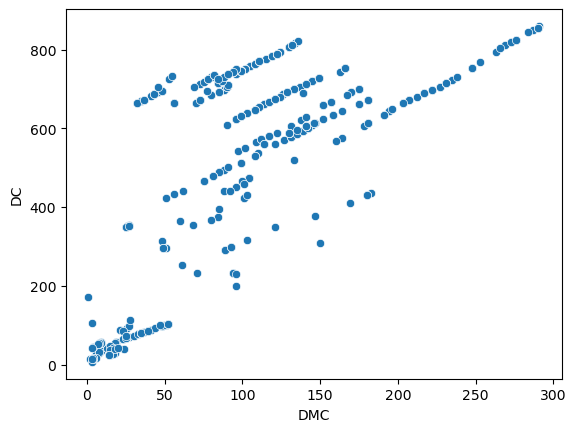

In [771]:
#Problem 5
#1 
ff = pd.read_csv('forestfires.csv')
#we want to predict the area burned 
ff = pd.get_dummies(ff, columns=['month', 'day']).astype(int)
ff['area'] = np.sqrt(ff['area'])

import seaborn as sns
sns.scatterplot(x=ff['DMC'],y=ff['DC'])
r = np.corrcoef(ff['DMC'], ff['DC'])
r
#if my threshold is 0.5, I should drop one of the columns (see below)

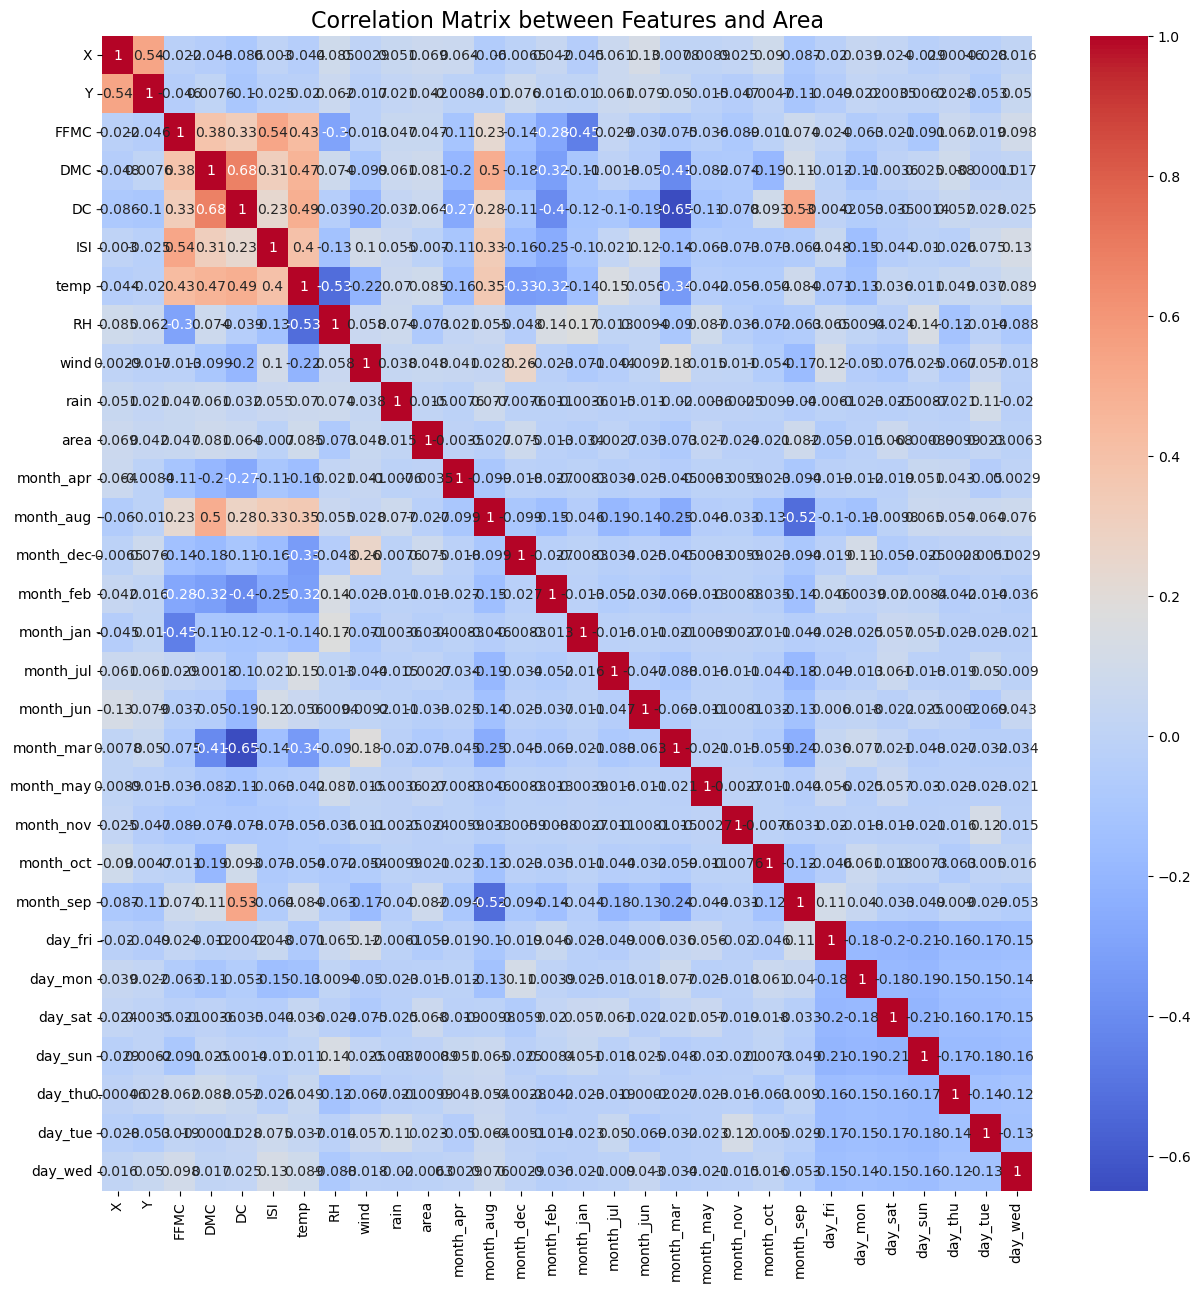

In [772]:
plt.figure(figsize=(15,15))
sns.heatmap(ff.corr(), annot = True, cmap = 'coolwarm') 
plt.title('Correlation Matrix between Features and Area', size = 16) 
plt.show()

In [775]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

ff_standard = scaler.fit_transform(ff[['X', 'Y', 'FFMC','DMC','DC', 'ISI',\
                                       'temp', 'RH', 'wind', 'rain']])


ff_standard = pd.DataFrame(ff_standard, columns=['X', 'Y', 'FFMC','DMC','DC', 'ISI',\
                                       'temp', 'RH', 'wind', 'rain'])
ff_standardized = pd.concat([ff_standard,ff[['area', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed']]],axis=1)

ff_standardized = ff_standardized.drop(columns='DMC')

In [776]:
train_index = np.random.choice(np.arange(0,517),362,replace=False)

In [777]:
ff_test = ff_standardized.drop(train_index)
ff_train = ff_standardized.drop(ff_test.index)

In [778]:
#2
#model A
model = lr(fit_intercept=True)

X_train = ff_train.drop(columns=['area'])
y_train = ff_train.area
X_test = ff_test.drop(columns=['area'])
y_test = ff_test.area

model.fit(X_train, y_train)

print(model.intercept_,model.coef_)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

0.4732005535432626 [ 3.95880278e-01 -9.57344047e-02  2.77024996e-01 -1.21513829e+00
 -3.59116961e-01  6.98996165e-01  1.54027930e-01  3.81823616e-01
 -4.28286633e-03 -2.49965025e-01  1.15669859e+00  3.04263874e+00
 -9.84535221e-01 -1.78477681e+00 -6.36936736e-02 -8.18986141e-01
 -1.36533332e+00 -3.04185886e+00 -1.77635684e-15  1.15626686e+00
  2.95354487e+00 -4.92728331e-01 -8.82292116e-03  4.17067587e-01
  9.11038678e-02 -6.88043220e-01  2.75770270e-01  4.05652747e-01]
Mean Squared Error: 10.220346997577225


In [779]:
#model B, testing the terms with highest correlation to reduce MSE
model = lr(fit_intercept=True)

columns = ['temp','month_aug','RH','FFMC','wind','ISI','DC']
X_train = ff_train[columns]
y_train = ff_train.area
X_test = ff_test[columns]
y_test = ff_test.area

model.fit(X_train, y_train)

print(model.intercept_,model.coef_)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

1.9987109782313497 [ 0.39450884 -0.76288986 -0.03767536  0.1220273   0.35842422 -0.28192747
  0.30153138]
Mean Squared Error: 9.092810041349177


In [780]:
ff_standardized['RH*temp'] = ff_standardized['RH'] * ff_standardized['temp']
ff_standardized['month_aug*temp'] = ff_standardized['temp']* ff_standardized['month_aug']
ff_standardized['wind*temp'] = ff_standardized['wind'] * ff_standardized['temp']
ff_standardized['ISI*temp'] = ff_standardized['ISI'] * ff_standardized['temp']
ff_standardized['month_aug*rain'] = ff_standardized['rain'] * ff_standardized['month_aug']
ff_standardized['temp_sq'] = ff_standardized['temp']**2
ff_standardized['RH_sq'] = ff_standardized['RH']**2
ff_standardized['ISI_sq'] = ff_standardized['ISI']**2
ff_standardized['X*Y'] = ff_standardized['X']*ff_standardized['Y']
ff_test = ff_standardized.drop(train_index)
ff_train = ff_standardized.drop(ff_test.index)

In [781]:
# model C testing interactive terms 
model = lr(fit_intercept=True)

columns = ['temp','month_aug','RH','wind*temp','FFMC','wind','ISI','X','Y','X*Y']
X_train = ff_train[columns]
y_train = ff_train.area
X_test = ff_test[columns]
y_test = ff_test.area

model.fit(X_train, y_train)

print(model.intercept_,model.coef_)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

1.946508994674186 [ 0.58577708 -0.65498028  0.05440413 -0.11349684  0.22058934  0.30664406
 -0.31610023  0.27995877 -0.08905763 -0.03708902]
Mean Squared Error: 9.048229297770112


In [798]:
#model D — testing the squared terms to see if they're helpful, other features are chosen from 
# beta variables in part 3 lol 

model = lr(fit_intercept=True)

X_train = ff_train[['X','wind','temp_sq']]
y_train = ff_train.area
X_test = ff_test[['X','wind','temp_sq']]
y_test = ff_test.area

model.fit(X_train, y_train)

print(model.intercept_,model.coef_)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

1.6080960052973396 [0.20124892 0.1183828  0.12365901]
Mean Squared Error: 8.701347817585349


In [790]:
# model E — testing if most features are arbitrary/insignificant by using constants

X_intercept = np.ones((len(ff_train), 1))
y = ff_train.area
X_test = np.ones((len(ff_test), 1))
y_test = ff_test.area

model_intercept_only = lr(fit_intercept=False)

model_intercept_only.fit(X_intercept, y)

intercept_value = model_intercept_only.coef_[0]
print(intercept_value)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

1.7446708501249715
Mean Squared Error: 8.90409191314833


/Users/joycezhang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [784]:
#3
import statsmodels.api as sm

X = ff_train.drop(columns='area')
y = ff_train.area

X_with_intercept = sm.add_constant(X)

model = sm.OLS(y, X_with_intercept).fit()

# Print a summary of the model
print(model.summary())

# Access confidence intervals for the beta coefficients
confidence_intervals = model.conf_int()
print("Confidence Intervals for Beta Coefficients:")
print(confidence_intervals)

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.216
Date:                Tue, 30 Jan 2024   Prob (F-statistic):              0.199
Time:                        11:43:24   Log-Likelihood:                -909.84
No. Observations:                 362   AIC:                             1888.
Df Residuals:                     328   BIC:                             2020.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0230      0.852     -0.

Discuss Problem 5: 

5.2: The minimum squared error that I achieved was 8.7, using model D. Observing my heatmap, I picked variables that I thought were relevant and tested that in model B. Then, I tried to create some interaction variables and squared variables with the relevant features in the heat map in model C. For model D, I played around and tested the features that would give me the lowest MSE through trial and error, then verified that they were the correct features that were significant given the betas in part 3. 

5.3: By testing the 95% confidence intervals for each feature, it is clear that most of the features are significant because their intervals include 0. Model D includes all the non-significant features, which gives me my lowest MSE. 

In [805]:
#Problem 6
from sklearn.linear_model import Lasso
scaler = StandardScaler()

ff_df = scaler.fit_transform(ff[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI',\
                                       'temp', 'RH', 'wind', 'rain']])


ff_df = pd.DataFrame(ff_df, columns=['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI',\
                                       'temp', 'RH', 'wind', 'rain'])
ff_df_standardized = pd.concat([ff_df,ff[['area', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed']]],axis=1)

X_train, X_test, y_train, y_test = train_test_split(ff_df_standardized.drop(columns=['area']),\
                                                    ff_df_standardized.area,\
                                                    test_size=0.3, random_state=42)

# Create a Lasso model
lasso_model = Lasso(alpha=0.1) 

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Access the coefficients of the model
coefficients = lasso_model.coef_
print("Coefficients:", coefficients)

lasso_model = Lasso(alpha=0.01) 

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")

coefficients = lasso_model.coef_
print("Coefficients:", coefficients)

lasso_model = Lasso(alpha=0.012) 

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")

coefficients = lasso_model.coef_
print("Coefficients:", coefficients)

lasso_model = Lasso(alpha=0.001) 

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")

coefficients = lasso_model.coef_
print("Coefficients:", coefficients)

Mean Squared Error: 11.887958924350142
Coefficients: [ 0.25337042  0.          0.          0.24019693  0.         -0.
  0.02187984 -0.          0.          0.         -0.         -0.
  0.          0.         -0.          0.         -0.         -0.
  0.         -0.         -0.          0.         -0.          0.
  0.         -0.          0.          0.         -0.        ]

Mean Squared Error: 11.435606982994829
Coefficients: [ 0.3605396  -0.          0.05731876  0.50751772 -0.40169879 -0.08069488
  0.24596452  0.          0.13889591  0.00319723 -0.06096511 -0.21007731
  1.62251876  0.          0.          0.         -0.52297646 -0.40773953
  1.16044479 -0.          0.          0.61107835 -0.25221644  0.17098139
  0.25910859 -0.1369925  -0.          0.0966041  -0.13508114]

Mean Squared Error: 11.428712602531922
Coefficients: [ 0.35646677 -0.          0.05388965  0.48753648 -0.355674   -0.0808317
  0.23503602  0.          0.13763915  0.00301531 -0.         -0.21333911
  1.44402388  0.  

In order to minimize MSE, I kept decreasing until the MSE started increasing again, reaching an alpha of 0.012 for the smallest MSe of 11.429. For a = 0.1 too few features are used, while a = 0.001 uses too many features. In comparison to the previous model with 8.7 MSE, the Lasso's MSE is much higher. Thus model D is better at predicting because it has lower MSE. 